* Classical $\rightarrow$ test hypothesis and estimate CI 
* Bayesian $\rightarrow$  calculate the probability that your hypothesis is correct

# Learning about the proportion of Landfalls

* Population $\rightarrow$ All past & future hurricane in the North Atlantic.
* $\pi \rightarrow$ The proportion of this population that hit the US at hurricane intensity. (unkown)

Beta density here representing your prior belief about the population percentage of all hurricanes making landfall $\pi$, is proportional to:

$$g(\pi) \sim \pi^{a-1} (1-\pi)^{b-1}$$

Parameters $a$ and $b$ are chosen to reflect your prior beliefs about $\pi$.

$$m = \frac{a}{(a + b)}$$
\
$$v = \frac{m (1-m)}{(a + b + 1)}$$

* $m$ : mean of a beta density,
* $v$ : variance of a beta density

But it's difficult to asses the values of $m$ and $v$ so it's easier to obtain $a$ and $b$ indirectly through percentiles of the distribution.

* Prior Beliefs:

The percentage of hurricanes making landfall in the US is equally likely to be smaller or larger than 0.3. Moreover, suppose we are 90% confident that $\pi$ is less than 0.5.

* Statistical translation:
Median (0.3), 90th percentile (0.5) 


* `p`: distribution of percentile
* `x`: $\pi$ value

In [1]:
# source('D:/isi/coding_repo/garbage/garbagecodes/RMisc/HurricaneR/03/prior_landfallMy.R')

Take our prior distribution and combine it with likelihood function from our data.

Data : 
* Annual-basin wide (`A`)
* US landfall (`US`)

In [2]:
A <- read.table("ATL.txt", header=T)
US <- read.table("H.txt", header=T)
Yr <- 2006

In [3]:
head(A)

Year TS H MH ACE
1 1851 6  3 1  36 
2 1852 5  5 1  73 
3 1853 8  4 2  76 
4 1854 5  3 1  31 
5 1855 5  4 1  18 
6 1856 6  4 2  49

In [4]:
head(US)

Year All MUS G FL E
1 1851 1   1   0 1  0
2 1852 3   1   1 2  0
3 1853 0   0   0 0  0
4 1854 2   1   1 0  1
5 1855 1   1   1 0  0
6 1856 2   1   1 1  0

In [5]:
sum(A$H[A$Year >= Yr])

[1] 34

In [6]:
sum(US$All[US$Year >= Yr])

[1] 4

Find 4 of 34 hurricanes made land fall in the US:

$\pi = 0.12 = 12 \%$

* success $(s)$ : hurricanes make land fall
* failure: $f$
* $n$ : number of hurricanes
* $f = n - s$

Likelihood function:

$$L(s, f|\pi) \sim \pi^{s} (1-\pi)^{f},
0 \lt \pi \lt 1
$$

Beta Density:
* $a = s+1$
* $b = f + 1$

Posterior Density:
* Prior Density: $g(\pi)$
* likelihood function: $L(\text{data}|\pi)$

$$g(\pi|data) \sim g(\pi)L(\text{data}|\pi)$$

1. Prior beta density parameters:
* $a$
* $b$

2. Likelihood beta density parameters:
* $s$
* $f$

3. Posterior beta density parameters:
* $a + s$
* $b + f$

We use Bayesian Conjugate Model, where Prior and Posterior Densities have the same functional form.

# Inference

Warning message:
"package 'LearnBayes' was built under R version 4.0.3"


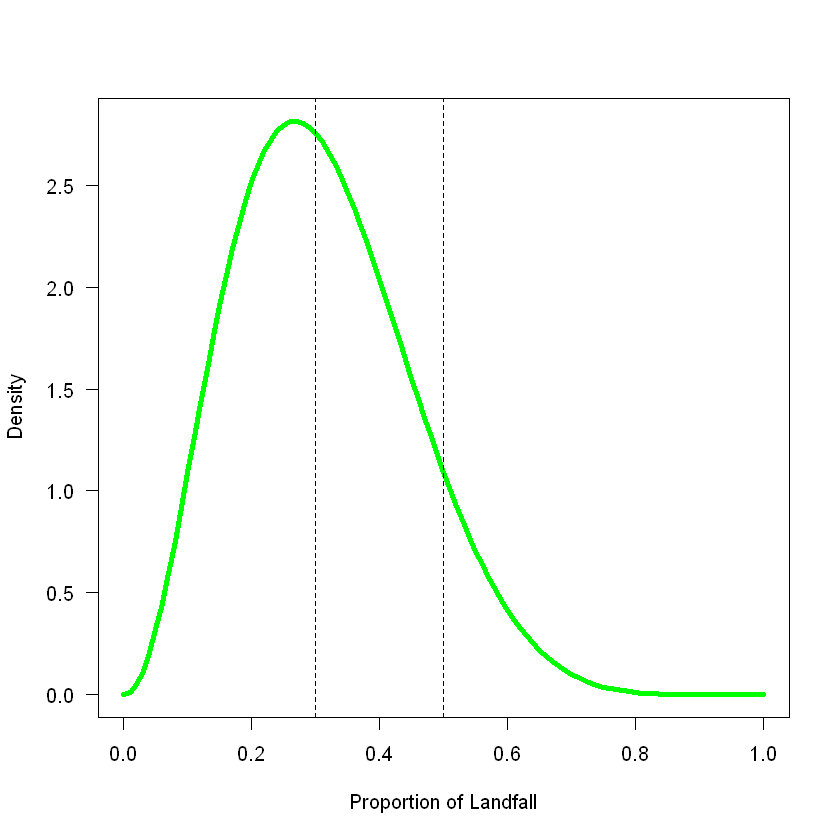

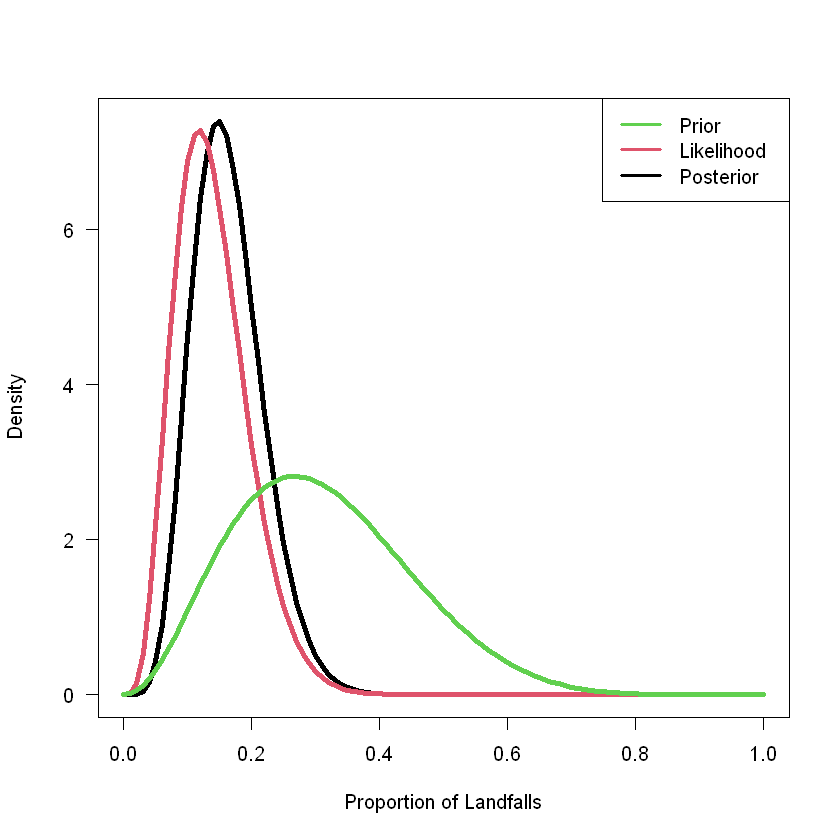

In [7]:
source('D:/isi/coding_repo/garbage/garbagecodes/RMisc/HurricaneR/03/prior_landfallMy.R')

How likely is that the population percentage of land falls is $\leq 25\%$ ?

Answer: Compute posterior probability $P(\pi \leq 0.25|\text{data, prior})$

In [8]:
pbeta(q=.25, a + s, b + f)

[1] 0.9303188

* Given the evidence in hand (data & our prior belief), there is 93% chance that less than or equal to quarter of all hurricanes hit the US.

* That it is quite unlikely (1.5%) that more than 3 in 10 hurricanes make US landfall.

In [9]:
1 - pbeta(.3, a + s, b + f)

[1] 0.01456779

Classical statistics approach:

$$H_{0}: \pi \gt 0.3\\H_{a}: \pi \leq 0.3$$

In [10]:
# obtain p-value
prop.test(s, s + f, p=.3, alt='less')$p.value

[1] 0.01645533

$p-$value of 0.016 indicates that if the null hypothesis is true (the proportion is greater than 0.3), the evidence seems unusual. We conclude there is moderate evidence against the null.

# Credible Interval

95% CI for the percentage of landfalls is obtained from the 2.5th and 97.5th percentiles of the posterior density. 

In [11]:
qbeta(c(.025, .975), a + s, b + f)

[1] 0.07132751 0.28388203

We can conclude that we are 95% confident that the true proportion lies inside this interval:
$$[0.071, 0.284]$$

For large enough sample, 95% CI can be obtained by using:
$$\hat{p} \pm \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \times \Phi^{-1}(0.975)$$

* $\pi$: population proportion
* $\hat{p}$ : sample proportion
* $n$: sample size
* $\Phi^{-1}(0.975)$: Inverse of the Cumulative Distribution Function (97.5th percentile value from a standard normal distribution).

In [12]:
prop.test(s, s + f)$conf.int

[1] 0.03837248 0.28391275
attr(,"conf.level")
[1] 0.95

# Predictive Density

$$f(\bar{l}) = \int{f(\bar{l}|\pi) g(\pi) d\pi}$$

* $\bar{l}$: number of US landalls in the future

In [14]:
# probablility of 7 landfalls

ab <- c(a + s, b + f)
m <- 7; lf <- 0:m
plf <- pbetap(ab, m, lf)
round(cbind(lf, plf), digits=3)

lf plf  
[1,] 0  0.312
[2,] 1  0.367
[3,] 2  0.216
[4,] 3  0.081
[5,] 4  0.021
[6,] 5  0.004
[7,] 6  0.000
[8,] 7  0.000

In [15]:
# simulate 1000 draws from the posterior and store them in p
p <- rbeta(n = 1000, a + s, b + f)

In [16]:
lc <- rbinom(n = 1000, size=7, prob=p)
table(lc)

lc
  0   1   2   3   4   5 
314 368 206  89  20   3 

From 1000 simulations, 314 no landfalls, bla bla bla

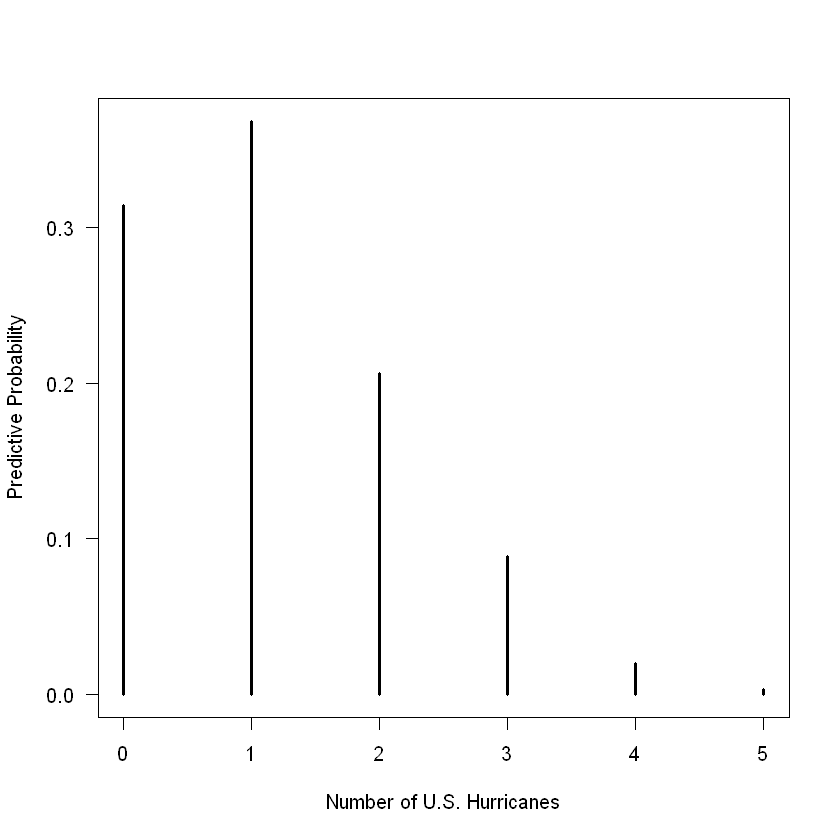

In [18]:
freq <- table(lc)
pp <- freq / sum(freq)
plot(pp, type='h', xlab='Number of U.S. Hurricanes', 
    las=1, lwd=3, ylab='Predictive Probability')

In [19]:
# cumulative sum of probability
cumsum(pp)

0     1     2     3     4     5 
0.314 0.682 0.888 0.977 0.997 1.000

In [22]:
mc <- length(pp) - 1
int <- discint(cbind(0:mc, pp), .95)
int
# 97.7% CI on 0-3

$prob
    3 
0.977 

$set
0 1 2 3 
0 1 2 3

In [23]:
# confirmation
lp <- (1 - as.numeric(int$prob)) / 2
up <- 1 - lp
(qbeta(up, a + s, b + f) - 
qbeta(lp, a + s, b + f)) * 7

[1] 1.71834